In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
import numpy as np
from ddal import DDAL

iris = load_iris()

In [2]:
df_x = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df_y = df_x.pop('target')

df_x_train = df_x[0:50]
df_y_train = df_y[0:50]


In [3]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(df_x_train, df_y_train)

DecisionTreeClassifier()

In [4]:
ddal = DDAL(size_batch=50, theta=0.005, lambida=0.95)

df_x_test_batch_1 = df_x[50:100]
df_y_test_batch_1 = df_y[50:100].to_frame()

df_x_test_batch_1.reset_index(inplace=True, drop=True)
df_y_test_batch_1.reset_index(inplace=True, drop=True)

In [5]:
for index, row in df_x_test_batch_1.iterrows():
    y_pred = classifier.predict_proba(df_x_test_batch_1.iloc[[index]])
    max_y_pred_prob = y_pred.max()
    ddal.count_selected_instances(max_y_pred_prob)

ddal.compute_current_density()

In [6]:
if ddal.detection_module():
    print('Drift Detected')
    ddal.reset()

### test if it will detect that data comes from different distribution

In [7]:
df_x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sbs

test for normaldistribution

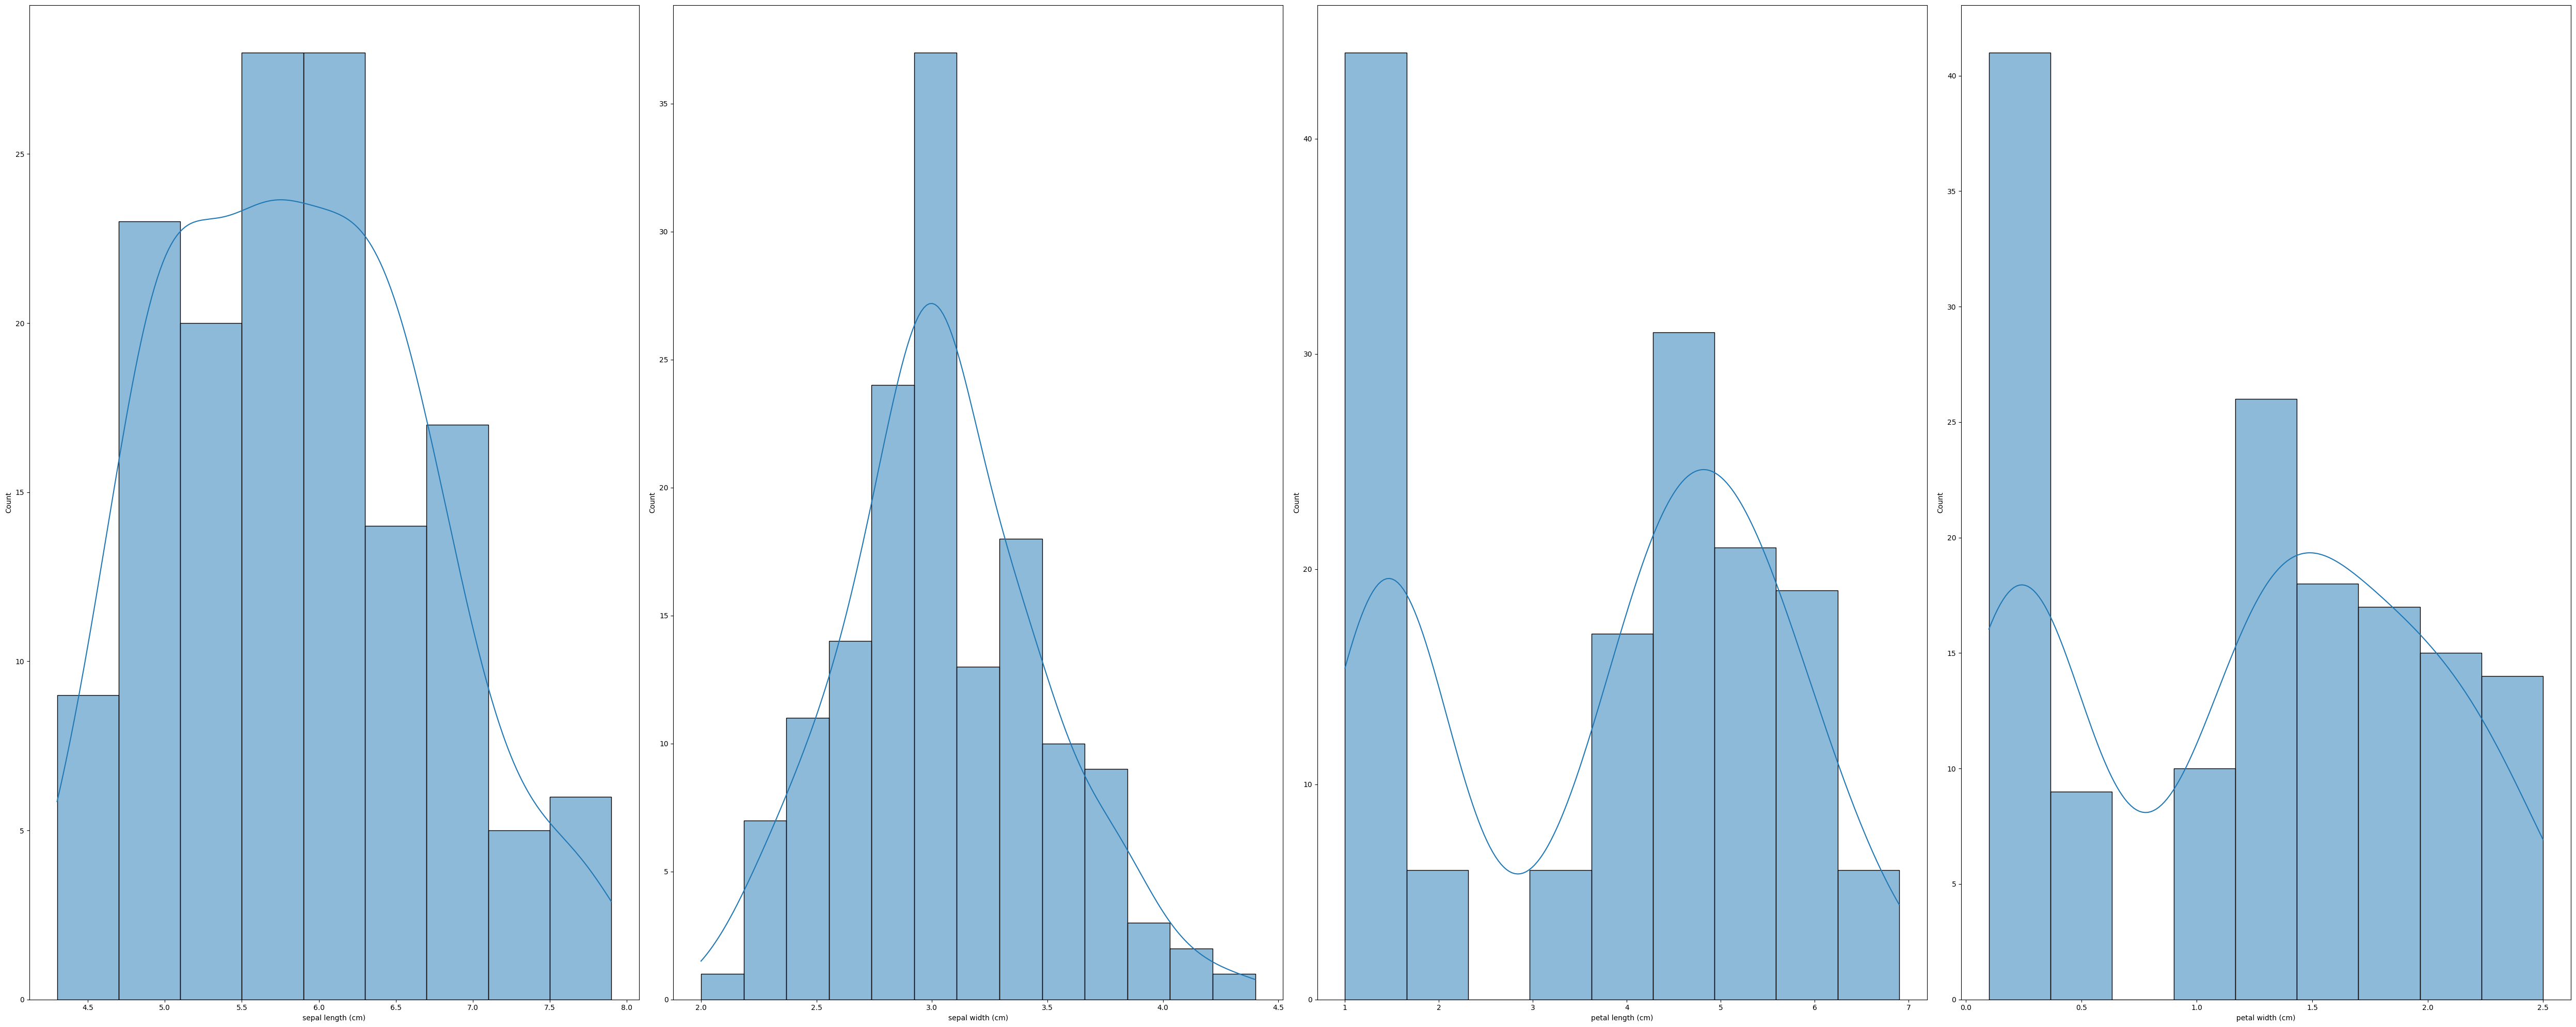

In [17]:
# Assuming df_x is your DataFrame
fig, axs = plt.subplots(1,len(df_x.columns), figsize=(50, 5*len(df_x.columns)))

for i, c in enumerate(df_x.columns):
    sbs.histplot(data=df_x, x=c, kde=True, ax=axs[i])

plt.tight_layout()
plt.show()